In [9]:
import csv
import random
import math
import operator
import matplotlib.pyplot as plt

In [10]:
def loadDataset(filename, split, trainingSet=[], testSet=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset) - 1):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])


def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)


def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance) - 1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors


def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]


def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct / float(len(testSet))) * 100.0

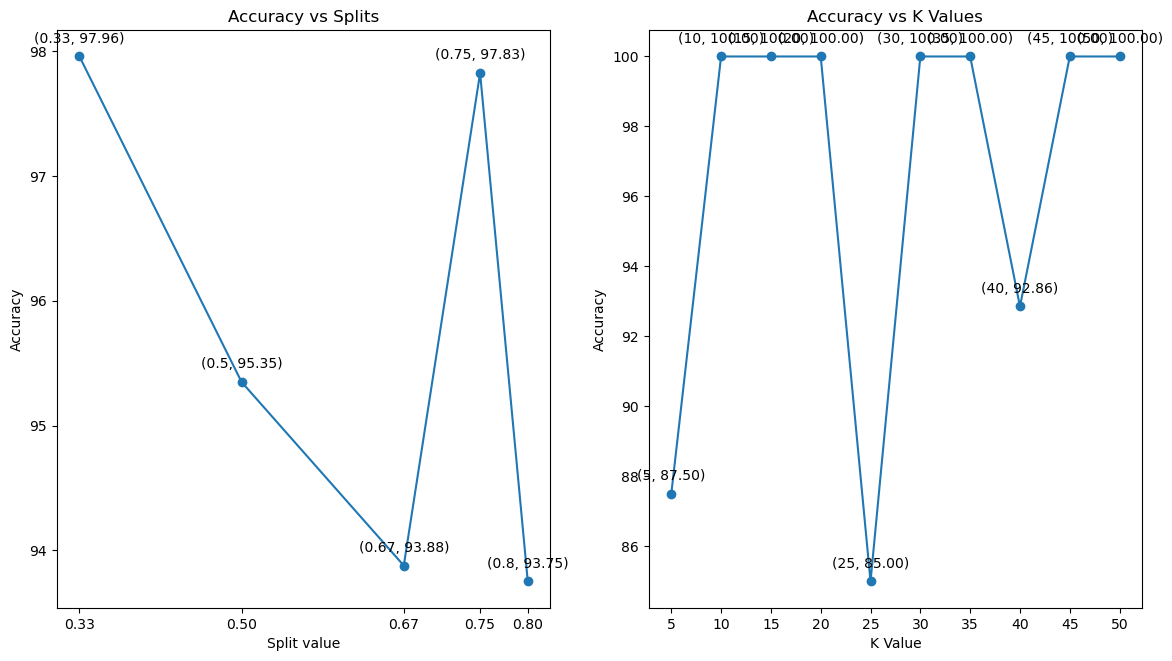

In [37]:
no_iterations = [5, 10]
splits = [0.33, 0.5, 0.67, 0.75, 0.8]
k_values = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

fig = plt.figure(figsize=(14, 7.5))
for i in range(2):
    fg = fig.add_subplot(1, 2, i + 1)
    accuracies = [[], []]
    for j in range(no_iterations[i]):
        # prepare data
        trainingSet = []
        testSet = []
        split = 0.9 if i != 0 else splits[j]
        loadDataset('iris.csv', split, trainingSet, testSet)
        # print('Train set: ' + repr(len(trainingSet)))
        # print('Test set: ' + repr(len(testSet)))
        # generate predictions
        predictions = []
        k = 2 if i == 0 else k_values[j]
        for x in range(len(testSet)):
            neighbors = getNeighbors(trainingSet, testSet[x], k)
            result = getResponse(neighbors)
            predictions.append(result)
            # print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
        accuracy = getAccuracy(testSet, predictions)
        # print('Accuracy: ' + repr(accuracy) + '%')
        accuracies[0].append(accuracy)
        accuracies[1].append(split if i == 0 else k)
    fg.plot(accuracies[1], accuracies[0], marker='o')
    fg.set_title(f"Accuracy vs {'Splits' if i == 0 else 'K Values'}")
    fg.set_ylabel("Accuracy")
    fg.set_xlabel(f"{'Split value' if i == 0 else 'K Value'}")
    fg.set_xticks(splits if i == 0 else k_values)
    for l in range(len(accuracies[0])):
        fg.annotate(f"({accuracies[1][l]}, {accuracies[0][l]:.2f})", (accuracies[1][l], accuracies[0][l]), textcoords="offset points", xytext=(0, 10), ha="center")